In [1]:
import numpy as np
import pandas as pd
import ipdb
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import nbimporter
from Kuramoto_dynamicalModels import *
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding
#%matplotlib inline  
#%matplotlib notebook
#%pylab

Importing Jupyter notebook from Kuramoto_dynamicalModels.ipynb


In [2]:
def make_manifold(X,E,tau):
    '''
    Creates a manifold embedded in R^E by time
    delaying the time series X by tau
    
    Args:
        X: Time series
        E: Dimension of embedding space
        tau: time delay
        
    Returns:
        embedding_x: a array of L - (E-1)*tau points
                    in R^E.
    '''
    
    # get length of time series
    L = X.shape[0]
    
    # initialize the embedding array matrix
    embedding_x =np.zeros((L - (E-1)*tau,E))
    
    i=0
    # create embedding matrix
    for t in range((E-1)*tau,L):
        # create a sequence of numbers between t-(E-1)*tau
        # and t+tau spaced by tau
    
        range_iterable = range(t-(E-1)*tau,t+tau,tau)
        
        #reverse the order of the sequence and coerce in a list
        range_revered_iterable = list(reversed(range_iterable))
        
        
        #put the entries of X at indices, range_revered_iterable,
        #in the ith row of embedding_x
        
        embedding_x[i,:] = X[range_revered_iterable]
        i+=1
    return embedding_x

In [3]:
def plot_embedding(df, algorithm,filename):
    '''
    plots embedding of data with ISOMAPS or PCA
    
    Args:
        df: dataframe
        algorithm: PCA or ISOMAP
        filename: location and name to save file
    '''
    
    # apply dimensionality reduction algorithm
    
    if algorithm == 'PCA':
        pca = PCA(n_components=3)
        embedded_manifold = pca.fit_transform(df)
        plot_2D_title = 'PCA embedding in 2D'
        plot_3D_title = 'PCA embedding in 3D'
    elif algorithm == 'ISOMAP':
        imp = Isomap(n_components=3)
        embedded_manifold = imp.fit_transform(df)
        plot_2D_title = 'ISOMAPS embedding in 2D'
        plot_3D_title = 'ISOMAPS embedding in 3D'

    plt.rcParams['figure.figsize'] = [10,5]

    fig = plt.figure()
    #plot the embedded manifold in 2D
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(embedded_manifold[:,0],embedded_manifold[:,1],'.',markersize=1)
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_title(plot_2D_title)

    #plot the embedded manifold in 3D
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot3D(embedded_manifold[:,0],embedded_manifold[:,1],embedded_manifold[:,2],'.',markersize=1)
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_zlabel('component 3')
    ax.set_title(plot_3D_title)
    plt.savefig(filename,bbox_inches='tight')
    plt.show()

In [4]:
# these are our constants
N = 2  # number of variables
#omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
#theta0 = np.array([1.1735002435, 2.6194283291, 2.6006912657, 2.9369995793,2.3511319532]) # initial state 
K=10
omega =  np.array([ 2.31246433, 35.50794494])
theta0 = np.array([1.1735002435, 2.6194283291])
tinit = 0.0
tmax = 10.0
dt =  0.001

# Deterministic Kuramoto

## Strong Coupling

### Actual Data Embedding

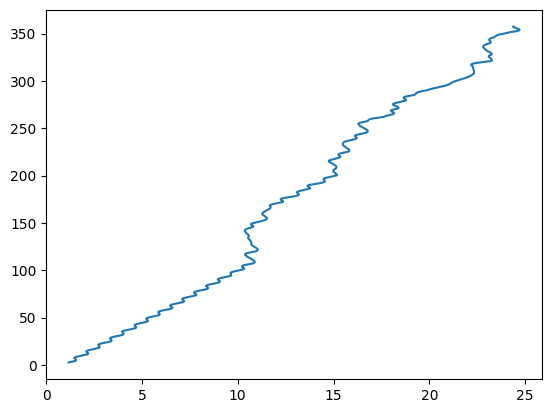

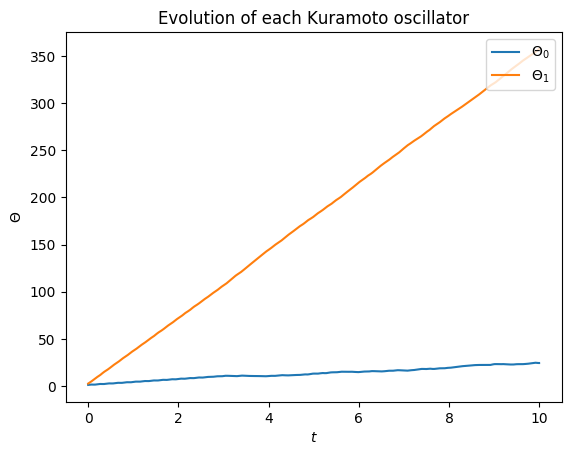

In [5]:
plt.clf()
plt.close()
kuramoto = Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
plt.rcParams.update(plt.rcParamsDefault)
plt.plot((sol[1])[:,0],(sol[1])[:,1])
plt.show()
kuramoto.evolution_plot()

#### Embed Cartesian Data

In [6]:
#transform data by taking sine and cosine
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['\Theta_0','\Theta_1'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(['\\' + col[1] + col[0]]).strip() for col in kuramoto_transform_df.columns.values]

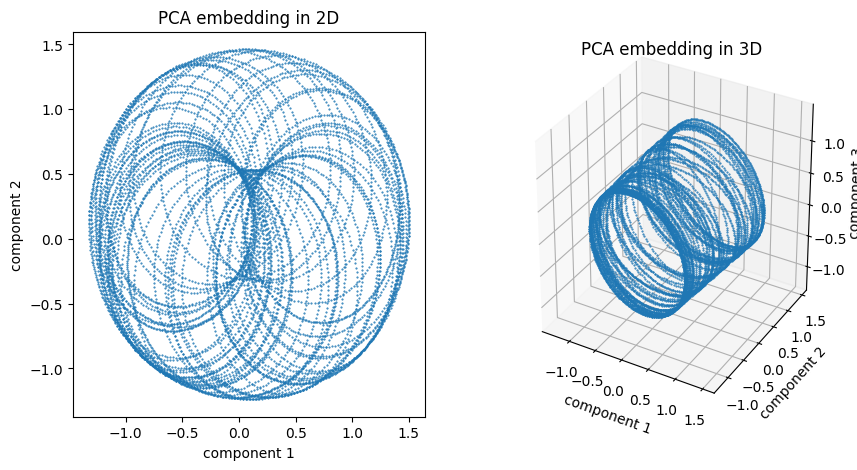

In [7]:
filename = 'pictures/K_'+str(K)+'_cartesian_PCA_embedding_actual_data_determistic_kuramoto.png'
plot_embedding(kuramoto_transform_df,'PCA',filename)

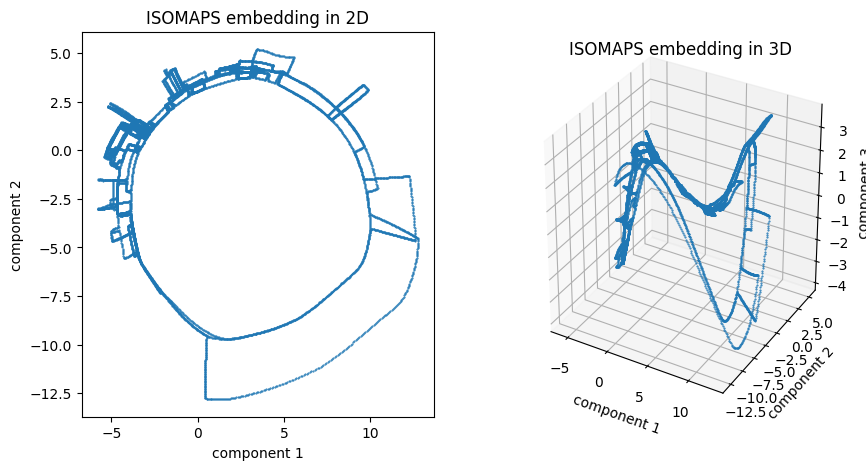

In [8]:
filename='pictures/K_'+str(K)+'_cartesian_ISOMAP_embedding_actual_data_determistic_kuramoto.png'
plot_embedding(kuramoto_transform_df,'ISOMAP',filename)

# Manifold Reconstruction using Taken's Embedding Theorem

## Generate Manifold Data

In [9]:
#get first column
y=kuramoto_transform_df.iloc[:,0].values

#set for parameters embedding 
E=2*2*N+1
tau=1

# create manifold
manifold = make_manifold(y,E,tau)

## Embed time lagged manifold

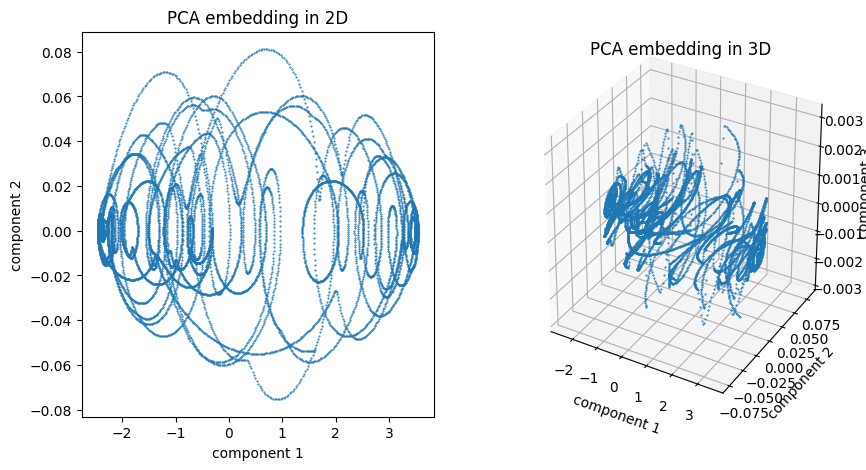

In [10]:
filename = 'pictures/K_'+str(K)+'_cartesian_PCA_embedding_time_lagged_determistic_kuramoto.png'
plot_embedding(manifold,'PCA',filename)

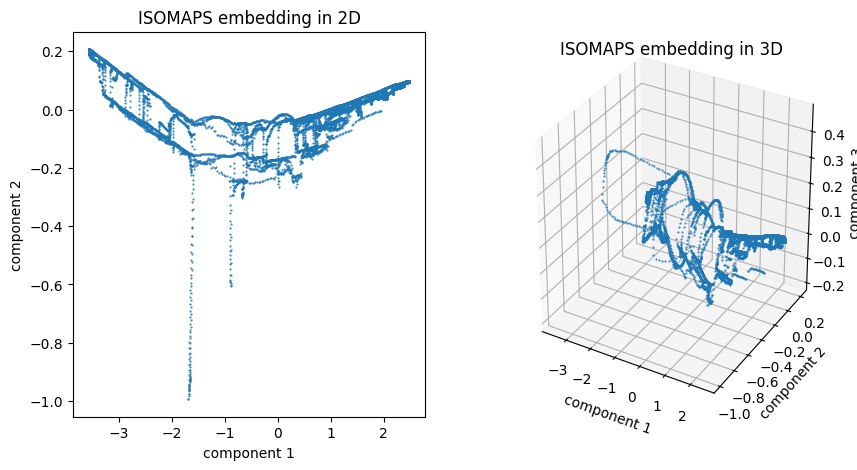

In [11]:
filename  = 'pictures/K_'+str(K)+'_cartesian_ISOMAPS_embedding_time_lagged_determistic_kuramoto.png'
plot_embedding(manifold,'ISOMAP',filename)

# Stochastic Kuramoto

## Strong Coupling, Low noise

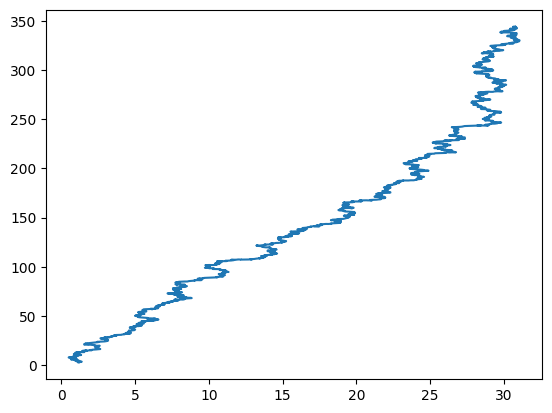

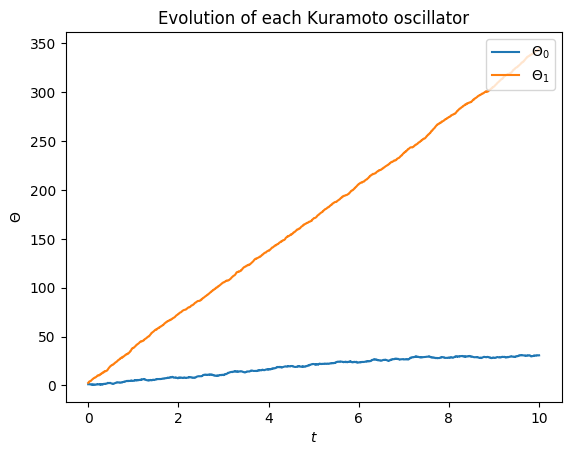

In [12]:
var=2.0
dt =  0.005
plt.clf()
plt.close()
kuramoto = Kuramoto(N,K,omega,sigma=var)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
plt.rcParams.update(plt.rcParamsDefault)
plt.plot((sol[1])[:,0],(sol[1])[:,1])
plt.show()
kuramoto.evolution_plot()

In [13]:
#transform data by taking sine and cosine
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['\Theta_0','\Theta_1'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(['\\' + col[1] + col[0]]).strip() for col in kuramoto_transform_df.columns.values]

## Embed Cartesian Data

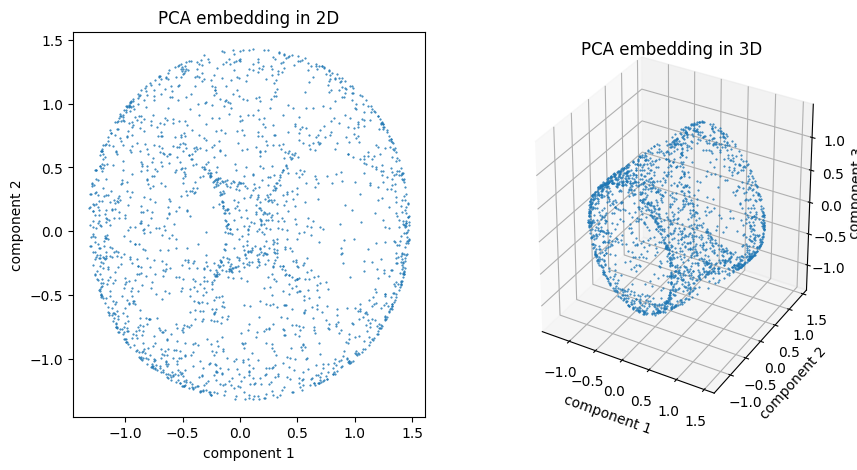

In [14]:
filename = 'pictures/K_'+str(K)+'_cartesian_PCA_embedding_actual_data_stochastic_kuramoto.png'
plot_embedding(kuramoto_transform_df,'PCA',filename)

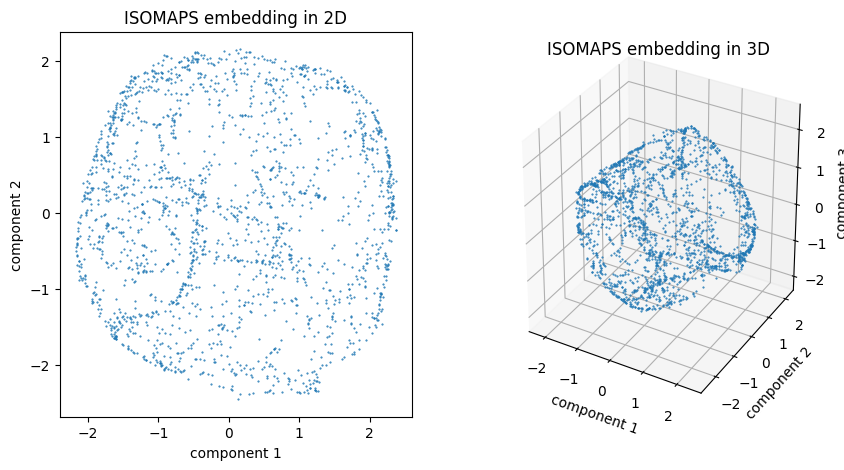

In [15]:
filename = 'pictures/K_'+str(K)+'_cartesian_ISOMAPS_embedding_actual_data_stochastic_kuramoto.png'
plot_embedding(kuramoto_transform_df,'ISOMAP',filename)

## Manifold Reconstruction using Taken's Embedding Theorem

## Generate Manifold data

In [16]:
#get first column
y=kuramoto_transform_df.iloc[:,0].values

#set for parameters embedding 
E=2*2*N+1
tau=1

# create manifold
manifold = make_manifold(y,E,tau)

## Embed Cartesian time-lagged Manifold

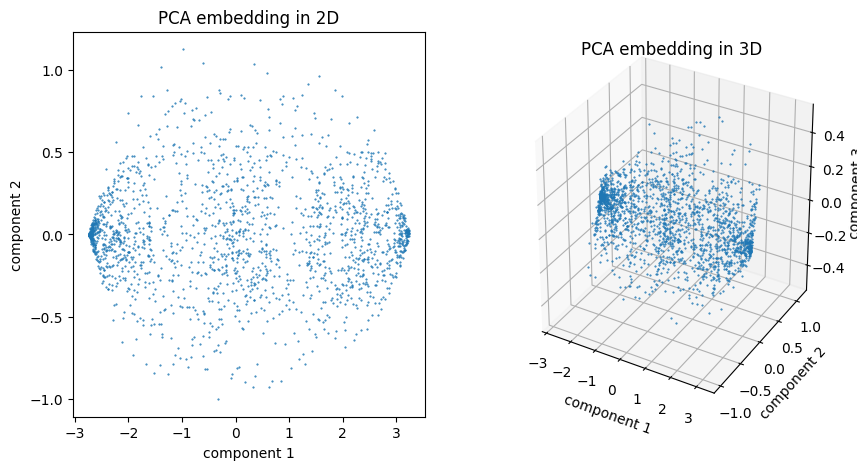

In [17]:
filename = 'pictures/K_'+str(K)+'_cartesian_PCA_embedding_time_lagged_stochastic_kuramoto.png'
plot_embedding(manifold,'PCA',filename)

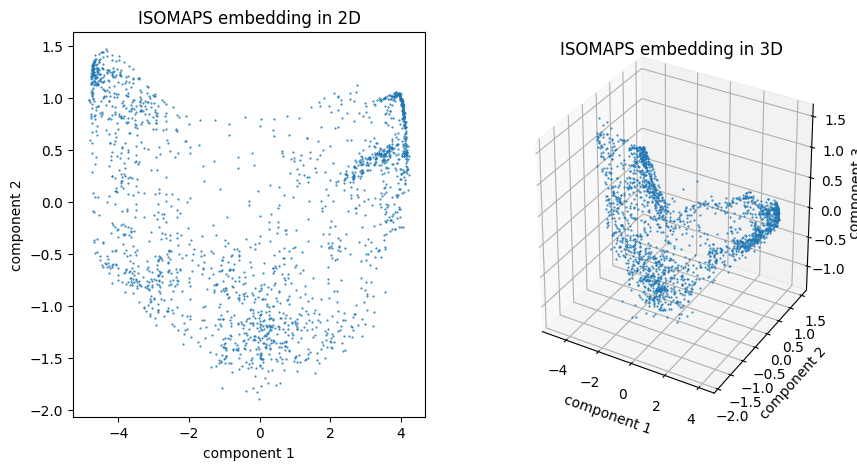

In [18]:
filename = 'pictures/K_'+str(K)+'_cartesian_ISOMAPS_embedding_time_lagged_stochastic_kuramoto.png'
plot_embedding(manifold,'ISOMAP',filename)